### This notebook includes modifying sentences with SUBJ modifiers and Verb modifiers.
- Author for Leftmost NounPhrase Modification and selection of type of Parser i.e. Neural Parser: Robert Vacareanu, Email: rvacareanu@arizona.edu
- Author for Data selection, extraction, Verb Modifiers and generation of modified sentences: Sushma Anand Akoju, Email: sushmaakoju@arizona.edu

In [1]:
!pip install benepar
!pip install spacy==3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.6 MB 50.7 MB/s 
     |████████████████████████████████| 5.8 MB 47.7 MB/s 
     |████████████████████████████████| 1.3 MB 34.3 MB/s 
     |████████████████████████████████| 182 kB 58.9 MB/s 
  Created wheel for benepar: filename=benepar-0.2.0-py3-none-any.whl size=37646 sha256=8df1bcf7006222e778d946bd0f75593586fe0ab582106e3924a5292e7d7bfff3
  Stored in directory: /root/.cache/pip/wheels/61/a2/7e/f3631621bc53a802ee5a333d2b1bd0582fd50402cf702b3e37
Successfully built benepar
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.9 MB 26.4 MB/s 
     |████████████████████████████████| 671 kB 70.7 MB/s 
     |████████████████████████████████| 12.3 MB 69.7 MB/s 
  Attempting uninstall: typer
    Found existing installation: typer 0.7.0
    Uninstalling typer-0.7.0:
   

In [2]:
!pip install svgling
!pip install svgwrite

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67 kB 3.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install transformers
!pip install evaluate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 81 kB 9.0 MB/s 
     |████████████████████████████████| 132 kB 57.9 MB/s 
     |████████████████████████████████| 212 kB 52.4 MB/s 
     |████████████████████████████████| 452 kB 57.5 MB/s 
     |████████████████████████████████| 127 kB 62.0 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [4]:
import nltk
import numpy as np
import pandas as pd

In [5]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
%cd gdrive/MyDrive/Colab\ Notebooks/natural\-logic
!ls

In [7]:
# !tar -xf  './clean.tar.xz'

In [8]:
# !tar -xf  './trans (2).tar.xz'

In [9]:
!python -m spacy download en_core_web_md

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 47.1 MB 113.6 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


### Load the dataframe with the sentences selected from SICK dataset

In [12]:
df = pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/natural-logic/final-datasets/modifiers-sentences-sick-dataset.xlsx",sheet_name="nov-8")
df.head()

,Sno,Premise,Unnamed: 2,Hypothesis,SICK label,Label,Sentence type,Full Parse Tree,Noun Phrase -> Determiner,Verb Phrase -> VBZ,Unnamed: 10,Unnamed: 11,modifier,Modifier POS,verb or noun,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,1.0,an old man is sitting in a field,NaN,a man is sitting in a field,Entailment,FE,sub|verb|obj,NaN,NaN,NaN,NaN,NaN,every,Determiner,noun,NaN,NaN,noun
1,2.0,A boy is standing in the cold water,NaN,A boy is standing in the water,Entailment,FE,sub|verb|obj,NaN,NaN,NaN,NaN,NaN,some,Determiner,noun,NaN,NaN,verb
2,3.0,Two children are hanging on a large branch,NaN,Two children are climbing a tree,Entailment,FE,sub|verb|obj,NaN,NaN,NaN,NaN,NaN,at least,"Adverb Phrase\n(Adverb + Adverb, superlative)",noun,NaN,NaN,noun and verb
3,4.0,a man is sitting in a field,NaN,an old man is sitting in a field,Entailment,RE,sub|verb|obj,NaN,NaN,NaN,NaN,NaN,not every,Noun Phrase \n(Adverb + Determiner),noun,NaN,NaN,NaN
4,5.0,A boy is standing in the water,NaN,A boy is standing in the cold water,Entailment,RE,sub|verb|obj,NaN,NaN,NaN,NaN,NaN,exactly one,Noun Phrase\n(Adverb + Cardinal number),noun,NaN,NaN,Determiner


### SICK data examples and the modifiers list

In [13]:
sick_df = df[['Sno', 'Premise', 'Hypothesis', 'SICK label', 'Label',
       'Full Parse Tree', 'Noun Phrase -> Determiner', 'Verb Phrase -> VBZ']][:20]
modifiers_df = df[['modifier', 'Modifier POS', 'verb or noun']][:20]

In [14]:
sick_df

,Sno,Premise,Hypothesis,SICK label,Label,Full Parse Tree,Noun Phrase -> Determiner,Verb Phrase -> VBZ
0,1.0,an old man is sitting in a field,a man is sitting in a field,Entailment,FE,NaN,NaN,NaN
1,2.0,A boy is standing in the cold water,A boy is standing in the water,Entailment,FE,NaN,NaN,NaN
2,3.0,Two children are hanging on a large branch,Two children are climbing a tree,Entailment,FE,NaN,NaN,NaN
3,4.0,a man is sitting in a field,an old man is sitting in a field,Entailment,RE,NaN,NaN,NaN
4,5.0,A boy is standing in the water,A boy is standing in the cold water,Entailment,RE,NaN,NaN,NaN
5,6.0,Two children are climbing a tree,Two children are hanging on a large branch,Entailment,RE,NaN,NaN,NaN
6,7.0,A boy is hitting a baseball,A child is hitting a baseball,Entailment,FE,NaN,NaN,NaN
7,8.0,Two dogs are playing by a tree,Two dogs are playing by a plant,Entailment,FE,NaN,NaN,NaN
8,9.0,A child is hitting a baseball,A boy is hitting a baseball,Entailment,RE,NaN,NaN,NaN
9,10.0,Two dogs are playing by a plant,Two dogs are playing by a tree,Entailment,RE,NaN,NaN,NaN


In [15]:
modifiers_df.head(3)

,modifier,Modifier POS,verb or noun
0,every,Determiner,noun
1,some,Determiner,noun
2,at least,"Adverb Phrase\n(Adverb + Adverb, superlative)",noun


### Modifiers dictionary (for saving the modifier and the corresponding "verb or noun")

In [16]:
modifiers_dict = {v['modifier']:v['verb or noun'] for v in modifiers_df[['modifier', 'verb or noun']].to_dict(orient='records')}
modifiers = [v['modifier'] for v in modifiers_df[['modifier', 'verb or noun']].to_dict(orient='records') ]
modifiers

['every',
 'some',
 'at least',
 'not every',
 'exactly one',
 'all but one',
 'every one of',
 'not',
 'no',
 'no',
 'brown',
 'yellow',
 'brown',
 'blue',
 'red',
 'green',
 'happy',
 'sad',
 'good',
 'bad']

In [17]:
import benepar, spacy
import nltk
benepar.download('benepar_en3')
nlp = spacy.load('en_core_web_md')
nlp.add_pipe('benepar', config={'model': 'benepar_en3'})
doc = nlp('The time for action is now. It is never too late to do something.')
sent = list(doc.sents)[0]
# print(sent._.parse_string)
print(list(sent._.children)[0])

[nltk_data] Downloading package benepar_en3 to /root/nltk_data...
[nltk_data]   Unzipping models/benepar_en3.zip.
You're using a T5TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


The time for action


/usr/local/lib/python3.8/dist-packages/torch/distributions/distribution.py:45: UserWarning: <class 'torch_struct.distributions.TreeCRF'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  warnings.warn(f'{self.__class__} does not define `arg_constraints`. ' +


### Extracting Noun Phrases and Modifying the Noun phrases for each of the examples

In [18]:
def get_leftmost_np(s):
  print(s._.parse_string)
  for child in s._.children:
    if child._.labels[0] == 'NP':
      return child

doc = nlp('The time for action is now.')
sent = list(doc.sents)[0]
np = get_leftmost_np(sent)
for w in np:
  print(w.tag_)
doc = nlp("A classroom is full of students")
sent = list(doc.sents)[0]
np = get_leftmost_np(sent)
for w in np:
  print(w,w.tag_)

(S (NP (NP (DT The) (NN time)) (PP (IN for) (NP (NN action)))) (VP (VBZ is) (ADVP (RB now))) (. .))
DT
NN
IN
NN
(S (NP (DT A) (NN classroom)) (VP (VBZ is) (ADJP (JJ full) (PP (IN of) (NP (NNS students))))))
A DT
classroom NN


In [19]:
def get_rightmost_vp(s):
  for child in s._.children:
    if child._.labels[0] == 'VP':
      return child

doc = nlp('The time for action is now.')
sent = list(doc.sents)[0]
print(sent._.parse_string)
vp = get_rightmost_vp(sent)
for w in vp:
  print(w.tag_)

doc = nlp('every old man is sitting in a field.')
sent = list(doc.sents)[0]
print(sent._.parse_string)
vp = get_rightmost_vp(sent)
for w in vp:
  print(w.tag_)

(S (NP (NP (DT The) (NN time)) (PP (IN for) (NP (NN action)))) (VP (VBZ is) (ADVP (RB now))) (. .))
VBZ
RB
(S (NP (DT every) (JJ old) (NN man)) (VP (VBZ is) (VP (VBG sitting) (PP (IN in) (NP (DT a) (NN field))))) (. .))
VBZ
VBG
IN
DT
NN


### Premise and Hypothesis set

In [20]:
this_nli_set = [[t['Premise'],t['Hypothesis']] for t in sick_df[['Premise', 'Hypothesis']].to_dict(orient='records')]
len(this_nli_set), this_nli_set

(20,
 [['an old man is sitting in a field', 'a man is sitting in a field'],
  ['A boy is standing in the cold water', 'A boy is standing in the water'],
  ['Two children are hanging on a large branch',
   'Two children are climbing a tree'],
  ['a man is sitting in a field', 'an old man is sitting in a field'],
  ['A boy is standing in the water', 'A boy is standing in the cold water'],
  ['Two children are climbing a tree',
   'Two children are hanging on a large branch'],
  ['A boy is hitting a baseball', 'A child is hitting a baseball'],
  ['Two dogs are playing by a tree', 'Two dogs are playing by a plant'],
  ['A child is hitting a baseball', 'A boy is hitting a baseball'],
  ['Two dogs are playing by a plant', 'Two dogs are playing by a tree'],
  ['A player is throwing the ball',
   'Two teams are competing in a football match'],
  ['A man is sitting in a field', 'A man is running in a field'],
  ['Two dogs are playing by a tree', 'Two dogs are sleeping by a tree'],
  ['A girl wi

### Total of 20 sentence examples from SICK Dataset

In [21]:
len(sick_df[['Premise', 'Hypothesis']].to_dict(orient='records'))

20

### Extract Parse String for Premises and Hypotheses

In [ ]:
premise_hypothesis_parses = []
leftmost_premise_hypothesis_nodes = []
# premise_hypothesis_parses_lcase = []

for this_list_item in this_nli_set:
  premise, hypothesis = this_list_item
  print(premise, hypothesis)
  doc = nlp(premise.strip())
  sent = list(doc.sents)[0]
  print("**********Premise****************")
  print("parse_string",sent._.parse_string)
 
  print("labels",sent._.labels)
  print("children",list(sent._.children))
  print("**********Hypothesis****************")
  doc2 = nlp(hypothesis.strip())
  sent2 = list(doc2.sents)[0]
  print("parse string" ,sent2._.parse_string)
  print("labels", sent2._.labels)
  print("children",list(sent2._.children)[0])
  premise_hypothesis_parses.append({'premise':[premise, sent._.parse_string,sent._.labels,list(sent._.children)], 
                                    'hypothesis': [hypothesis, sent2._.parse_string,sent2._.labels,list(sent2._.children)]})


In [23]:
# for mod, target_pos in modifiers_dict.items():
#     doc = nlp(mod.strip())
#     sent = list(doc.sents)[0]
#     print(sent._.parse_string)

## View the Parse Tree of an example Premise

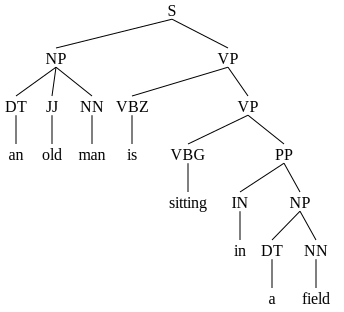

In [24]:
import svgling

this_tree = nltk.Tree.fromstring(premise_hypothesis_parses[0]['premise'][1])
svgling.draw_tree(this_tree, relative_units=False, debug=False)

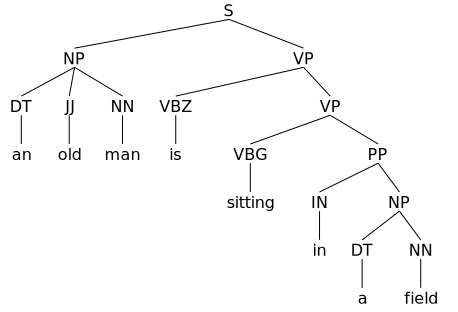

In [25]:
# svgling.core.nltk_tree_options.global_font_style = "font-color:white;"

svgling.draw_tree(this_tree, relative_units=False, global_font_style=svgling.core.MONO, average_glyph_width=1.5)
t = svgling.draw_tree(this_tree, relative_units=False, global_font_style=svgling.core.MONO, average_glyph_width=1.5)
# t.movement_arrow((1,), (0,), stroke_width=1)
t

### Simple traversal (for NLTK & SVGLING parse trees)

In [26]:
heads = []
def traverse_parse_tree(tree : nltk.tree.Tree):
  for subtree in tree:
    # print("tree, ", tree, subtree)
    if type(subtree) is nltk.tree.Tree:
      if subtree.label() == "VP":
        # print("this is a head in this VerbPhrase VP subtree with root as VP, ", subtree.pos())
        print("pos",subtree.pos(), subtree.label())
        traverse_parse_tree(subtree)
        heads.append(subtree)

traverse_parse_tree(this_tree)

pos [('is', 'VBZ'), ('sitting', 'VBG'), ('in', 'IN'), ('a', 'DT'), ('field', 'NN')] VP
pos [('sitting', 'VBG'), ('in', 'IN'), ('a', 'DT'), ('field', 'NN')] VP


In [27]:
heads

[Tree('VP', [Tree('VBG', ['sitting']), Tree('PP', [Tree('IN', ['in']), Tree('NP', [Tree('DT', ['a']), Tree('NN', ['field'])])])]),
 Tree('VP', [Tree('VBZ', ['is']), Tree('VP', [Tree('VBG', ['sitting']), Tree('PP', [Tree('IN', ['in']), Tree('NP', [Tree('DT', ['a']), Tree('NN', ['field'])])])])])]

In [28]:
verbs = []
def traverse_heads(head : nltk.tree.Tree):
  for subtree in head:
    print("tree, ", head)
    if type(subtree) is nltk.tree.Tree and ( subtree.label() == "VBZ" or subtree.label() == "VBG"):
      # print(subtree)
      print("this is a verb VBG subtree with root as, "+subtree.label(), subtree.pos())
      verbs.append(''.join(subtree.leaves()))
      # print("pos",subtree.pos(), subtree.label())
      traverse_heads(subtree)

for head in heads:
  traverse_heads(head)

tree,  (VP (VBG sitting) (PP (IN in) (NP (DT a) (NN field))))
this is a verb VBG subtree with root as, VBG [('sitting', 'VBG')]
tree,  (VBG sitting)
tree,  (VP (VBG sitting) (PP (IN in) (NP (DT a) (NN field))))
tree,  (VP (VBZ is) (VP (VBG sitting) (PP (IN in) (NP (DT a) (NN field)))))
this is a verb VBG subtree with root as, VBZ [('is', 'VBZ')]
tree,  (VBZ is)
tree,  (VP (VBZ is) (VP (VBG sitting) (PP (IN in) (NP (DT a) (NN field)))))


In [29]:
verbs

['sitting', 'is']

## Testing some modifiers over single sentence

In [30]:
# modifiers = {"Some", "Every", "An"}
this_premise = 'Every old man is sitting in a field.'
doc = nlp(this_premise)
new_premises = []

sent = list(doc.sents)[0]

np = get_leftmost_np(sent)

for w in np:
  print(w.i)
  if w.tag_ == "DT":
    print(w.tag_, w.text, w.i)
    this_list = set(modifiers).difference(w.text)
    for modifier in this_list:
      temp = [w.text for w in sent]
      if modifier == "at least":
        m = "at least one"
        temp[w.i] = m
      else:   
        temp[w.i] = modifier
      print(temp)
      new_premises.append(temp)

(S (NP (DT Every) (JJ old) (NN man)) (VP (VBZ is) (VP (VBG sitting) (PP (IN in) (NP (DT a) (NN field))))) (. .))
0
DT Every 0
['not', 'old', 'man', 'is', 'sitting', 'in', 'a', 'field', '.']
['green', 'old', 'man', 'is', 'sitting', 'in', 'a', 'field', '.']
['every', 'old', 'man', 'is', 'sitting', 'in', 'a', 'field', '.']
['some', 'old', 'man', 'is', 'sitting', 'in', 'a', 'field', '.']
['yellow', 'old', 'man', 'is', 'sitting', 'in', 'a', 'field', '.']
['red', 'old', 'man', 'is', 'sitting', 'in', 'a', 'field', '.']
['brown', 'old', 'man', 'is', 'sitting', 'in', 'a', 'field', '.']
['sad', 'old', 'man', 'is', 'sitting', 'in', 'a', 'field', '.']
['bad', 'old', 'man', 'is', 'sitting', 'in', 'a', 'field', '.']
['not every', 'old', 'man', 'is', 'sitting', 'in', 'a', 'field', '.']
['all but one', 'old', 'man', 'is', 'sitting', 'in', 'a', 'field', '.']
['exactly one', 'old', 'man', 'is', 'sitting', 'in', 'a', 'field', '.']
['blue', 'old', 'man', 'is', 'sitting', 'in', 'a', 'field', '.']
['happy',

In [31]:
sent._.parse_string

'(S (NP (DT Every) (JJ old) (NN man)) (VP (VBZ is) (VP (VBG sitting) (PP (IN in) (NP (DT a) (NN field))))) (. .))'

## Get Modified sentences given a set of modifiers, sentence, noun phrases

In [32]:
def get_modified_sentences(modifiers:set,tokens:list, nounphrases:list, isAdjective: bool):
  new_sentences = {}
  assert len(modifiers) or len(tokens) or len(nounphrases), "One of the inputs is of zero length!"
  for i,word in enumerate(nounphrases):
    print(word.i, word.tag_, word.text, i)
    
    if word.tag_ == "DT" and (word.text in modifiers or word.text in ["a","an", "there", "the"]):
      print(word.tag_, word.text, word.i)
      this_list = modifiers.difference({word.text})
      print("thislist:",this_list)
      for modifier in this_list:
        temp = tokens.copy()
        temp[word.i] = modifier
        print(modifier,temp)
        if nounphrases[i-1].tag_ == "RB":
          temp.pop(i-1)
        new_sentences[modifier] = temp
  
    if word.tag_ == "CD":
      print("word",word)
      for modifier in modifiers:
          temp = tokens.copy()
          if isAdjective:
            print(modifier)
            temp.insert(word.i + 1,modifier)

          elif modifier.endswith('one'):
            print(modifier)
            m = modifier[:-3]
            temp.insert(word.i + 1,"of")

            temp.insert(word.i, m)
          else:
            
            print(modifier)
            temp.insert(word.i,modifier)
          print(temp)
          new_sentences[modifier] = temp
  
  return new_sentences

### Test generating modified sentences using simple script

In [33]:
#what about? Many, Most, Few, Several -> require plural objects. NN in NP -> man -> men and also VBZ in VP is -> are
print(modifiers, modifiers_dict)

selected = [m for m in ['every', 'some', 'at least','not every','exactly one',
                       'all but one','everyone of', 'no']]
adjectives = [ jj for jj in ["green", "happy", "sad", 
                          "good", "bad"]]
this_premise = 'every old man is sitting in a field.'
this_premise = "not every old man is sitting in a field"
this_premise = "there is no girl in white dancing"
doc = nlp(this_premise)
new_premises = []

sent = list(doc.sents)[0]
tokens = [w.text for w in sent]
np = get_leftmost_np(sent)
print(np)
# res = get_modified_sentences(selected, tokens, np, False)
# res1 = get_modified_sentences(adjectives, tokens, np, True)
# print(res)

['every', 'some', 'at least', 'not every', 'exactly one', 'all but one', 'every one of', 'not', 'no', 'no', 'brown', 'yellow', 'brown', 'blue', 'red', 'green', 'happy', 'sad', 'good', 'bad'] {'every': 'noun', 'some': 'noun', 'at least': 'noun', 'not every': 'noun', 'exactly one': 'noun', 'all but one': 'noun', 'every one of': 'noun', 'not': 'verb', 'no': 'verb', 'brown': 'noun', 'yellow': 'noun', 'blue': 'noun', 'red': 'noun', 'green': 'noun', 'happy': 'noun', 'sad': 'noun', 'good': 'noun', 'bad': 'noun'}
(S (NP (EX there)) (VP (VBZ is) (NP (NP (DT no) (NN girl)) (PP (IN in) (NP (JJ white) (NN dancing))))))
there


In [34]:
# for val in premise_hypothesis_parses:
#   premise = val['premise'][0]
#   hypothesis = val['hypothesis'][0]
#   print(premise, hypothesis)

### Get all modified sentences after connecting premises and Hypotheses
For this we use following 3 modifiers :


1.   Modified Premise, Original Hypothesis
2.   original Premise, Modified Hypothesis
3.   Modified Premise, Modified Hypothesis


In [35]:
def get_all_modified_list(tokens:list, modifiers:list, adjectives:list, nounphrases:list):
  new_sentences = {}
  new_sentences["original"] = " ".join(tokens)
  new_sentences.update({m:" ".join(p) for m,p in get_modified_sentences(set(modifiers), tokens, nounphrases, False).items()})
  new_sentences.update({m:" ".join(p) for m,p in get_modified_sentences(set(adjectives), tokens, nounphrases, True).items()})
  return new_sentences

## Modify each of premise and hypothesis and get all modified sentences list

In [36]:
premise_hypothesis_modified = []
counter = 1

selected = [m for m in ['every', 'some', 'at least','not every','exactly one',
                       'all but one','everyone of', 'no']]
adjectives = [ jj for jj in ["green", "happy", "sad", "good", "bad"]]
for val in premise_hypothesis_parses:
  premise = val['premise'][0]
  hypothesis = val['hypothesis'][0]

  print(counter, " : ",premise, hypothesis)
  
  doc = nlp((premise.lower()).strip())
  sent = list(doc.sents)[0]
  print("**********Premise****************")
  tokens = [w.text for w in sent]
  np = get_leftmost_np(sent)
  print(np)

  new_premises = get_all_modified_list(tokens,selected, adjectives, np)
  print(new_premises)

  print("**********Hypothesis****************")
  doc2 = nlp((hypothesis.lower()).strip())
  sent2 = list(doc2.sents)[0]
  tokens = [w.text for w in sent2]
  np = get_leftmost_np(sent2)
  new_hypothesis = get_all_modified_list(tokens,selected, adjectives, np)
  print(new_hypothesis)

  this_set = []
  this_set.append({"premise": new_premises["original"], "hypothesis": new_hypothesis["original"]})
  
  for this_key in selected + adjectives:
    
    this_p = new_premises[this_key]
    this_h = new_hypothesis[this_key]

    this_set.append({"Modifier":this_key,"Premise/Hypothesis/Both":"Premise","Part of Premise/Hypothesis Modified":"Subject","premise": this_p, "hypothesis": new_hypothesis["original"]})
    this_set.append({"Modifier":this_key,"Premise/Hypothesis/Both":"Hypothesis","Part of Premise/Hypothesis Modified":"Subject","premise": new_premises["original"], "hypothesis": this_h})
    this_set.append({"Modifier":this_key,"Premise/Hypothesis/Both":"Both","Part of Premise/Hypothesis Modified":"Subject","premise": this_p, "hypothesis": this_h})

  premise_hypothesis_modified.extend(this_set)

1  :  an old man is sitting in a field a man is sitting in a field
**********Premise****************
(S (NP (DT an) (JJ old) (NN man)) (VP (VBZ is) (VP (VBG sitting) (PP (IN in) (NP (DT a) (NN field))))))
an old man
0 DT an 0
DT an 0
thislist: {'all but one', 'some', 'exactly one', 'everyone of', 'no', 'at least', 'not every', 'every'}
all but one ['all but one', 'old', 'man', 'is', 'sitting', 'in', 'a', 'field']
some ['some', 'old', 'man', 'is', 'sitting', 'in', 'a', 'field']
exactly one ['exactly one', 'old', 'man', 'is', 'sitting', 'in', 'a', 'field']
everyone of ['everyone of', 'old', 'man', 'is', 'sitting', 'in', 'a', 'field']
no ['no', 'old', 'man', 'is', 'sitting', 'in', 'a', 'field']
at least ['at least', 'old', 'man', 'is', 'sitting', 'in', 'a', 'field']
not every ['not every', 'old', 'man', 'is', 'sitting', 'in', 'a', 'field']
every ['every', 'old', 'man', 'is', 'sitting', 'in', 'a', 'field']
1 JJ old 1
2 NN man 2
0 DT an 0
DT an 0
thislist: {'green', 'sad', 'bad', 'happy', '

## Each modification is among 13 modifiers. Total of 800 

In [37]:
len(premise_hypothesis_modified), ((len(selected)+ len(adjectives)) * len(premise_hypothesis_parses) *3 ) + 20

(800, 800)

In [38]:
pd.DataFrame.from_dict(premise_hypothesis_modified).to_csv("modified_noun_phrases_dec_22.csv")

## Verb Phrase Modifiers and Approach

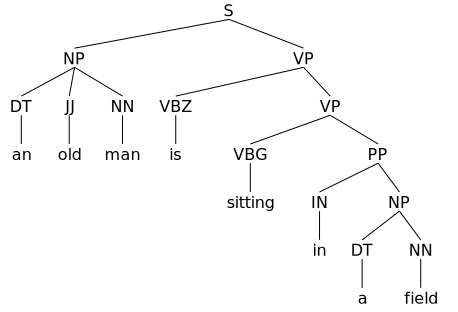

In [39]:
this_tree = nltk.Tree.fromstring(premise_hypothesis_parses[0]['premise'][1])
svgling.draw_tree(this_tree, relative_units=False, global_font_style=svgling.core.MONO, average_glyph_width=1.5)
# t = svgling.draw_tree(this_tree, relative_units=False, global_font_style=svgling.core.MONO, average_glyph_width=1.5)

### Get a Span and verify the values

In [40]:
span = doc[:7]
for t in span.subtree:

  # print(t.rightmost_path)
  print(t.text, t.tag_, t.head, [(a.tag_, a.text) for a in t.ancestors])
  print("\n",t.right_edge)

a DT classroom [('NN', 'classroom'), ('VBZ', 'is')]

 a
classroom NN is [('VBZ', 'is')]

 classroom
is VBZ is []

 students
full JJ is [('VBZ', 'is')]

 students
of IN full [('JJ', 'full'), ('VBZ', 'is')]

 students
students NNS of [('IN', 'of'), ('JJ', 'full'), ('VBZ', 'is')]

 students


In [41]:
for s in sent.subtree:
  print(s.tag_, s.dep_, s.has_extension("VP"))

DT det False
NN nsubj False
VBZ ROOT False
JJ acomp False
IN prep False
NNS pobj False


### Sentence Parse Tree using RegEx for Extracting Verb Phrases
This approach is more or less like a rule, except this uses Regular Expressions.

1.   For each parse string for a given sentence (either premise/hypothesis).
2.   Split parse string by "(VP * )" patterns using Regex.
3.   Get the "rightmost" (last) split Verb Phrase
4.   Split by white space + parenthesis.
4.   For this split, (could have Verbs or more), so find all tag, text pairs
     that are between parenthesis inside this rightmost verb phrase
5.   For each tag, verify if this tag is in 'VB', 'VBD', 'VBG', 'VBN', 'VBP',
     'VBZ'
6.   If the tag is a verb from verb tense tags, then save the text    
     corresponding to this tag.



In [42]:
import re
matches = list(re.findall(r'\(VP (.*) \)', sent._.parse_string))
# print(sent._.parse_string.split('VP'))
strings = sent._.parse_string.strip().split('VP')
print(strings)
s = re.split(r"\s\(+",strings[-1].strip())[0]
print(s)
vb = re.findall(r'\((.*)\)',str(s))[0].split(' ')[1]
print(vb)
index = 0
s = sent.text.split(' ')
for i,token in enumerate(s):
  if vb == token:
    index = i
print(index)

['(S (NP (DT a) (NN classroom)) (', ' (VBZ is) (ADJP (JJ full) (PP (IN of) (NP (NNS students))))))']
(VBZ is)
is
2


In [43]:
sent._.parse_string

'(S (NP (DT a) (NN classroom)) (VP (VBZ is) (ADJP (JJ full) (PP (IN of) (NP (NNS students))))))'

In [44]:

s = re.split(r"\s\(+",strings[-1].strip())[0]
print(s)
vb = re.findall(r'\((.*)\)',str(s))[0].split(' ')
#[1]
this_verb = ""
verb_types = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']

for i,tag in enumerate(vb):
  if tag in verb_types:
    this_verb = vb[i+1]
print(this_verb)

(VBZ is)
is


### Selected Adverbs for modifying verbs
- "abnormally","elegantly","always","never"
- A man is abnormally sitting in a field
- A man is elegantly sitting in a field
- A man is always sitting in a field
- A man is never sitting in a field
- A man is not sitting in a field



In [45]:
adverbs = [ adv for adv in ["abnormally","elegantly","always","never"]]

### Get all modified sentences after connecting premises and Hypotheses
For this we use following 3 modifiers :

1.   Modified Premise, Original Hypothesis
2.   original Premise, Modified Hypothesis
3.   Modified Premise, Modified Hypothesis

In [46]:
def get_vb_modified_sentences(modifiers, sent):
  new_sentences = {}
  matches = list(re.findall(r'\(VP (.*) \)', sent._.parse_string))
  # print(sent._.parse_string.split('VP'))

  #get all Verb phrases
  strings = sent._.parse_string.strip().split('VP')

  #split by whitespaces
  s = re.split(r"\s\(+",strings[-1].strip())[0]

  #split by parenthesis
  vb = re.findall(r'\((.*)\)',str(s))[0].split(' ')[1]
  index = 0
  this_tokens = sent.text.split(' ')
  #print(this_tokens)

  #get index of the target VERB text
  for i,token in enumerate(this_tokens):
    if vb == token:
      index = i
  print(index)


  #modify and append the modified sentence
  for mod in modifiers:
    tokens = this_tokens.copy()
    tokens.insert(index,mod)
    print(tokens)
    new_sentences[mod] = tokens
  return new_sentences

In [47]:
def get_all_vb_modified_list(modifiers:list, adverbs:list, sentence):
  new_sentences = {}
  new_sentences["original"] = " ".join(tokens)

  new_sentences.update({m:" ".join(p) for m,p in get_vb_modified_sentences(set(modifiers), sentence).items()})
  new_sentences.update({m:" ".join(p) for m,p in get_vb_modified_sentences(set(adverbs), sentence).items()})
  return new_sentences

### Test for a single sentence

In [48]:
premise = "A player is throwing the ball"
doc = nlp((premise.lower()).strip())
sent = list(doc.sents)[0]
print([" ".join(p) for p in get_vb_modified_sentences(selected, sent)])
print([" ".join(p) for p in get_vb_modified_sentences(adverbs, sent)])

3
['a', 'player', 'is', 'every', 'throwing', 'the', 'ball']
['a', 'player', 'is', 'some', 'throwing', 'the', 'ball']
['a', 'player', 'is', 'at least', 'throwing', 'the', 'ball']
['a', 'player', 'is', 'not every', 'throwing', 'the', 'ball']
['a', 'player', 'is', 'exactly one', 'throwing', 'the', 'ball']
['a', 'player', 'is', 'all but one', 'throwing', 'the', 'ball']
['a', 'player', 'is', 'everyone of', 'throwing', 'the', 'ball']
['a', 'player', 'is', 'no', 'throwing', 'the', 'ball']
['e v e r y', 's o m e', 'a t   l e a s t', 'n o t   e v e r y', 'e x a c t l y   o n e', 'a l l   b u t   o n e', 'e v e r y o n e   o f', 'n o']
3
['a', 'player', 'is', 'abnormally', 'throwing', 'the', 'ball']
['a', 'player', 'is', 'elegantly', 'throwing', 'the', 'ball']
['a', 'player', 'is', 'always', 'throwing', 'the', 'ball']
['a', 'player', 'is', 'never', 'throwing', 'the', 'ball']
['a b n o r m a l l y', 'e l e g a n t l y', 'a l w a y s', 'n e v e r']


## For all Premises abd Hypotheses, get all modified sentence pairs

In [ ]:
premise_hypothesis_vb_modified = []
counter = 1

selected_v_mod = [m for m in ['not']]
adverbs = [ adv for adv in ["abnormally","elegantly","always","never"]]

for val in premise_hypothesis_parses:
  premise = val['premise'][0]
  hypothesis = val['hypothesis'][0]

  print(counter, " : ",premise, hypothesis)
  
  doc = nlp((premise.lower()).strip())
  sent = list(doc.sents)[0]
  print("**********Premise****************")
  tokens = [w.text for w in sent]

  new_premises = get_all_vb_modified_list(selected_v_mod, adverbs, sent)
  print(new_premises)

  print("**********Hypothesis****************")
  doc2 = nlp((hypothesis.lower()).strip())
  sent2 = list(doc2.sents)[0]
  tokens = [w.text for w in sent2]
  np = get_leftmost_np(sent2)
  new_hypothesis = get_all_vb_modified_list(selected_v_mod, adverbs, sent2)
  print(new_hypothesis)

  this_set = []
  
  this_set.append({"premise": new_premises["original"], "hypothesis": new_hypothesis["original"]})
  for this_key in selected_v_mod + adverbs:
    
    this_p = new_premises[this_key]
    this_h = new_hypothesis[this_key]

    this_set.append({"Modifier":this_key,"Premise/Hypothesis/Both":"Premise","Part of Premise/Hypothesis Modified":"Verb","premise": this_p, "hypothesis": new_hypothesis["original"]})
    this_set.append({"Modifier":this_key,"Premise/Hypothesis/Both":"Hypothesis","Part of Premise/Hypothesis Modified":"Verb","premise": new_premises["original"], "hypothesis": this_h})
    this_set.append({"Modifier":this_key,"Premise/Hypothesis/Both":"Both","Part of Premise/Hypothesis Modified":"Verb","premise": this_p, "hypothesis": this_h})

  premise_hypothesis_vb_modified.extend(this_set)

In [ ]:
premise_hypothesis_vb_modified

## Total of 320 Premise, Hypothesis pairs with verb modifiers

In [53]:
len(premise_hypothesis_vb_modified)

320

In [54]:
pd.DataFrame.from_dict(premise_hypothesis_vb_modified).to_csv("modified_verb_phrases_dec22.csv")

## Verifying Syntactic Correctness of the Modified sentences
- We use Perplexity score to verify the syntactic correctness of the modified sentences

In [55]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
premises = [v['premise'] for v in premise_hypothesis_vb_modified]
hypotheses = [v['hypothesis'] for v in premise_hypothesis_vb_modified]
premises.extend([v['premise'] for v in premise_hypothesis_modified])
hypotheses.extend([v['hypothesis'] for v in premise_hypothesis_modified])

In [57]:
len(premises), len(hypotheses)

(1120, 1120)

### Perplexity of premises using raw (untokenized) + no-stride approach

In [58]:
from evaluate import load
perplexity = load("perplexity",  module_type= "measurement")
results = perplexity.compute(data=premises, model_id='gpt2')

Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/548M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Using pad_token, but it is not set yet.


  0%|          | 0/70 [00:00<?, ?it/s]

In [59]:
import evaluate

perplexity = evaluate.load("perplexity", module_type="measurement")
input_texts = ["lorem ipsum", "Happy Birthday!", "Bienvenue"]
results = perplexity.compute(model_id='gpt2',
                             add_start_token=False,
                             data=input_texts)
results

Using pad_token, but it is not set yet.


  0%|          | 0/1 [00:00<?, ?it/s]

{'perplexities': [32.25424575805664, 1499.689697265625, 408.275390625],
 'mean_perplexity': 646.7397778828939}

In [60]:
from transformers import GPT2LMHeadModel, GPT2TokenizerFast

device = "cuda"
model_id = "gpt2-large"
model = GPT2LMHeadModel.from_pretrained(model_id).to(device)
tokenizer = GPT2TokenizerFast.from_pretrained(model_id)

Downloading:   0%|          | 0.00/666 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.25G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [61]:
from datasets import load_dataset, Dataset
encodings = tokenizer("\n\n".join(premises), return_tensors="pt")

Token indices sequence length is longer than the specified maximum sequence length for this model (10870 > 1024). Running this sequence through the model will result in indexing errors


In [62]:
import torch
from tqdm import tqdm

max_length = model.config.n_positions
stride = 1024
seq_len = encodings.input_ids.size(1)

nlls = []
prev_end_loc = 0
for begin_loc in tqdm(range(0, seq_len, stride)):
    end_loc = min(begin_loc + max_length, seq_len)
    trg_len = end_loc - prev_end_loc  # may be different from stride on last loop
    input_ids = encodings.input_ids[:, begin_loc:end_loc].to(device)
    target_ids = input_ids.clone()
    target_ids[:, :-trg_len] = -100

    with torch.no_grad():
        outputs = model(input_ids, labels=target_ids)

        # loss is calculated using CrossEntropyLoss which averages over input tokens.
        # Multiply it with trg_len to get the summation instead of average.
        # We will take average over all the tokens to get the true average
        # in the last step of this example.
        neg_log_likelihood = outputs.loss * trg_len

    nlls.append(neg_log_likelihood)

    prev_end_loc = end_loc
    if end_loc == seq_len:
        break

ppl1 = torch.exp(torch.stack(nlls).sum() / end_loc)

 91%|█████████ | 10/11 [00:05<00:00,  1.68it/s]


In [63]:
import torch
from tqdm import tqdm

max_length = model.config.n_positions
stride = 512
seq_len = encodings.input_ids.size(1)

nlls = []
prev_end_loc = 0
for begin_loc in tqdm(range(0, seq_len, stride)):
    end_loc = min(begin_loc + max_length, seq_len)
    trg_len = end_loc - prev_end_loc  # may be different from stride on last loop
    input_ids = encodings.input_ids[:, begin_loc:end_loc].to(device)
    target_ids = input_ids.clone()
    target_ids[:, :-trg_len] = -100

    with torch.no_grad():
        outputs = model(input_ids, labels=target_ids)

        # loss is calculated using CrossEntropyLoss which averages over input tokens.
        # Multiply it with trg_len to get the summation instead of average.
        # We will take average over all the tokens to get the true average
        # in the last step of this example.
        neg_log_likelihood = outputs.loss * trg_len

    nlls.append(neg_log_likelihood)

    prev_end_loc = end_loc
    if end_loc == seq_len:
        break

ppl2 = torch.exp(torch.stack(nlls).sum() / end_loc)

 91%|█████████ | 20/22 [00:11<00:01,  1.71it/s]


In [64]:
ppl1.tolist(), ppl2.tolist()

(1.481261968612671, 1.2698384523391724)

In [65]:
encodings = tokenizer("\n\n".join(hypotheses), return_tensors="pt")

max_length = model.config.n_positions
stride = 1024
seq_len = encodings.input_ids.size(1)

nlls = []
prev_end_loc = 0
for begin_loc in tqdm(range(0, seq_len, stride)):
    end_loc = min(begin_loc + max_length, seq_len)
    trg_len = end_loc - prev_end_loc  # may be different from stride on last loop
    input_ids = encodings.input_ids[:, begin_loc:end_loc].to(device)
    target_ids = input_ids.clone()
    target_ids[:, :-trg_len] = -100

    with torch.no_grad():
        outputs = model(input_ids, labels=target_ids)

        # loss is calculated using CrossEntropyLoss which averages over input tokens.
        # Multiply it with trg_len to get the summation instead of average.
        # We will take average over all the tokens to get the true average
        # in the last step of this example.
        neg_log_likelihood = outputs.loss * trg_len

    nlls.append(neg_log_likelihood)

    prev_end_loc = end_loc
    if end_loc == seq_len:
        break

ppl3 = torch.exp(torch.stack(nlls).sum() / end_loc)

 91%|█████████ | 10/11 [00:06<00:00,  1.64it/s]


In [66]:

max_length = model.config.n_positions
stride = 512
seq_len = encodings.input_ids.size(1)

nlls = []
prev_end_loc = 0
for begin_loc in tqdm(range(0, seq_len, stride)):
    end_loc = min(begin_loc + max_length, seq_len)
    trg_len = end_loc - prev_end_loc  # may be different from stride on last loop
    input_ids = encodings.input_ids[:, begin_loc:end_loc].to(device)
    target_ids = input_ids.clone()
    target_ids[:, :-trg_len] = -100

    with torch.no_grad():
        outputs = model(input_ids, labels=target_ids)

        # loss is calculated using CrossEntropyLoss which averages over input tokens.
        # Multiply it with trg_len to get the summation instead of average.
        # We will take average over all the tokens to get the true average
        # in the last step of this example.
        neg_log_likelihood = outputs.loss * trg_len

    nlls.append(neg_log_likelihood)

    prev_end_loc = end_loc
    if end_loc == seq_len:
        break

ppl4 = torch.exp(torch.stack(nlls).sum() / end_loc)

 91%|█████████ | 20/22 [00:11<00:01,  1.70it/s]


In [67]:
ppl3, ppl4

(tensor(1.5306, device='cuda:0'), tensor(1.3468, device='cuda:0'))